<h1 style="text-align: center;">Student Performance Factors</h1>

<span>Made by : <i>Imad El Maftouhi</i></span>

# Importing data and defining necessary tools

In [47]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt, math

# Settings

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']
colors = ['#003049', '#D62828', '#F77F00', '#FCBF49', '#EAE2B7']

# Importing dataset

In [50]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [51]:
df.sample()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1385,22,79,Low,High,Yes,6,96,Medium,Yes,1,High,Medium,Public,Neutral,2,No,College,Moderate,Male,68


# Generals

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [53]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [54]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [55]:
df.dropna(inplace=True)
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# Posing Questions and problems to solve

## Statistics and Probability

1. Descriptive Statistics: Calculate means, medians, modes, and standard deviations for each column.
2. Correlation Analysis: Compute correlation coefficients (e.g., Pearson's r) between each pair of columns to identify relationships.
3. Hypothesis Testing: Test hypotheses about the population means of Exam_Score based on different levels of Motivation_Level or Parental_Involvement.
4. Confidence Intervals: Construct confidence intervals for the population proportion of students with Learning_Disabilities or Internet_Access.
5. Probability Distributions: Fit probability distributions (e.g., normal, binomial) to Hours_Studied or Sleep_Hours to model the underlying distributions.

## Machine Learning

1. Regression Analysis: Predict Exam_Score using linear regression with Hours_Studied, Motivation_Level, and Parental_Involvement as features.
2. Classification: Train a classifier (e.g., logistic regression, decision tree) to predict Learning_Disabilities based on Previous_Scores, Motivation_Level, and Parental_Education_Level.
3. Feature Selection: Use techniques like mutual information or recursive feature elimination to select the most informative features for predicting Exam_Score.
4. Clustering: Apply k-means or hierarchical clustering to group students based on their Hours_Studied, Sleep_Hours, and Extracurricular_Activities.
Dimensionality Reduction: Use PCA or t-SNE to reduce the dimensionality of the dataset and visualize the relationships between columns.

## Deep Learning

1. Neural Network Regression: Build a neural network to predict Exam_Score using Hours_Studied, Motivation_Level, and Parental_Involvement as inputs.
2. Convolutional Neural Network (CNN): Design a CNN to analyze the relationships between Hours_Studied, Sleep_Hours, and Extracurricular_Activities as input features.
Recurrent Neural Network (RNN): Use an RNN to model the temporal relationships between Previous_Scores and Exam_Score.
3. Autoencoder: Train an autoencoder to learn a compressed representation of the dataset, which can be used for anomaly detection or dimensionality reduction.
4. Generative Adversarial Network (GAN): Develop a GAN to generate synthetic data that mimics the distribution of the original dataset.

# Solutions 

<p>Before we start doing anything, it's a good practice to split our data into two seperate dataframes, one for numerical variables, the other for categoricals.</p>

In [56]:
numVar = df.select_dtypes(include=["int64", "int32", "int16", "float64"]).copy()
numVar

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


## 1. Statistics and Probability

###  The mean 

The mean is generally calculated for numerical columns only. If we wish to find the mean of categorical columns for some reason, we can try to encode the columns and then calculate the mean.
Luckily, the **dataFrame.describe()** function does all the statistical calculcations for us and returns the results:

In [57]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


Now let's try to find the mean of the columns. First, we define a code for each unique value in each columns

In [58]:
catVar = df.select_dtypes(include=['object','category']).copy()
catVar

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [59]:
uniqueValues = [catVar[column].unique().tolist() for column in catVar]

uniqueValues=np.unique(np.concatenate(uniqueValues)) ## flatten the list of lists, then returns unique values only 

print(uniqueValues)


['College' 'Far' 'Female' 'High' 'High School' 'Low' 'Male' 'Medium'
 'Moderate' 'Near' 'Negative' 'Neutral' 'No' 'Positive' 'Postgraduate'
 'Private' 'Public' 'Yes']


In [60]:
categoricalDict = dict()
for header in catVar.columns: 
    categoricalDict[header] = catVar[header].value_counts().to_dict()

print(categoricalDict)


{'Parental_Involvement': {'Medium': 3251, 'High': 1836, 'Low': 1291}, 'Access_to_Resources': {'Medium': 3204, 'High': 1900, 'Low': 1274}, 'Extracurricular_Activities': {'Yes': 3807, 'No': 2571}, 'Motivation_Level': {'Medium': 3237, 'Low': 1864, 'High': 1277}, 'Internet_Access': {'Yes': 5893, 'No': 485}, 'Family_Income': {'Low': 2582, 'Medium': 2566, 'High': 1230}, 'Teacher_Quality': {'Medium': 3826, 'High': 1905, 'Low': 647}, 'School_Type': {'Public': 4434, 'Private': 1944}, 'Peer_Influence': {'Positive': 2553, 'Neutral': 2495, 'Negative': 1330}, 'Learning_Disabilities': {'No': 5710, 'Yes': 668}, 'Parental_Education_Level': {'High School': 3159, 'College': 1939, 'Postgraduate': 1280}, 'Distance_from_Home': {'Near': 3801, 'Moderate': 1941, 'Far': 636}, 'Gender': {'Male': 3688, 'Female': 2690}}


    In the previous couple of steps, all we did was get the list of unique categorical values and calculate the count for each value, while mapping it in a dictionnary to it's column name.
    In order to encode those values, I'm going to use the replace() function but I'd have to write a custom mapping dictionnary. I like this method because I have full control of the nature of the encoding.

In [61]:
encoding_map = {
    'Parental_Involvement': {'Low':1,'Medium':2,'High':3},
    'Access_to_Resources': {'Low':1,'Medium':2,'High':3},
    'Extracurricular_Activities': {'Yes':1,'No':2},
    'Motivation_Level': {'Low':1,'Medium':2,'High':3},
    'Internet_Access': {'No':1,'Yes':2},
    'Family_Income': {'Low':1,'Medium':2,'High':3},
    'Teacher_Quality': {'Low':1,'Medium':2, 'High':3},
    'School_Type': {'Public':1 ,'Private':2},
    'Peer_Influence': {'Positive':1,'Neutral':2, "Negative":3},
    'Learning_Disabilities': {'No':1,'Yes':2},
    'Parental_Education_Level': {'High School':1,'College':2,'Postgraduate':3},
    'Distance_from_Home': {'Near':1,'Moderate':2,'Far':3},
    'Gender': {'Male':1, 'Female':2}
    }

# testing 
encoded_df = catVar.copy()
encoded_df.replace(encoding_map, inplace=True)
encoded_df

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,1,3,2,1,2,1,2,1,1,1,1,1,1
1,1,2,2,1,2,2,2,1,3,1,2,2,2
2,2,2,1,2,2,2,2,1,2,1,3,1,1
3,1,2,1,2,2,2,2,1,3,1,1,2,1
4,2,2,1,2,2,2,3,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,3,2,2,2,2,3,2,1,1,1,1,1,2
6603,3,2,2,2,2,1,3,1,1,1,1,1,2
6604,2,1,1,1,2,1,2,1,3,1,3,1,2
6605,3,3,1,3,2,1,2,2,1,1,1,3,2


    Now, we can apply the dataFrame.describe() to the encoded data

In [62]:
encoded_df.describe()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6378.00000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,2.08545,2.098150,1.403104,1.907965,1.923957,1.788021,2.197241,1.304798,1.808247,1.104735,1.705394,1.503763,1.421762
std,0.69502,0.698635,0.490560,0.695758,0.265087,0.743526,0.601064,0.460358,0.756394,0.306236,0.780570,0.670442,0.493880
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.00000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,3.00000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
max,3.00000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000


### Correlation Analysis: Compute correlation coefficients (e.g., Pearson's r) between each pair of columns to identify relationships.


There can exist 3 cases study when addressing Correlation Analysis:
- Correlation between quantitatives variables.-> Pearson/Kardall/Spearson coefficients 
- Correlation between categoricals variables. -> Chi-square test
- Correlation between categoricals and quantitatives variables. -> Anova

In [63]:
numVar.corr(method='pearson')

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183,0.445104
Attendance,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976,0.580259
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898,-0.017171
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694,0.174283
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325,0.156829
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000,0.025148
Exam_Score,0.445104,0.580259,-0.017171,0.174283,0.156829,0.025148,1.000000


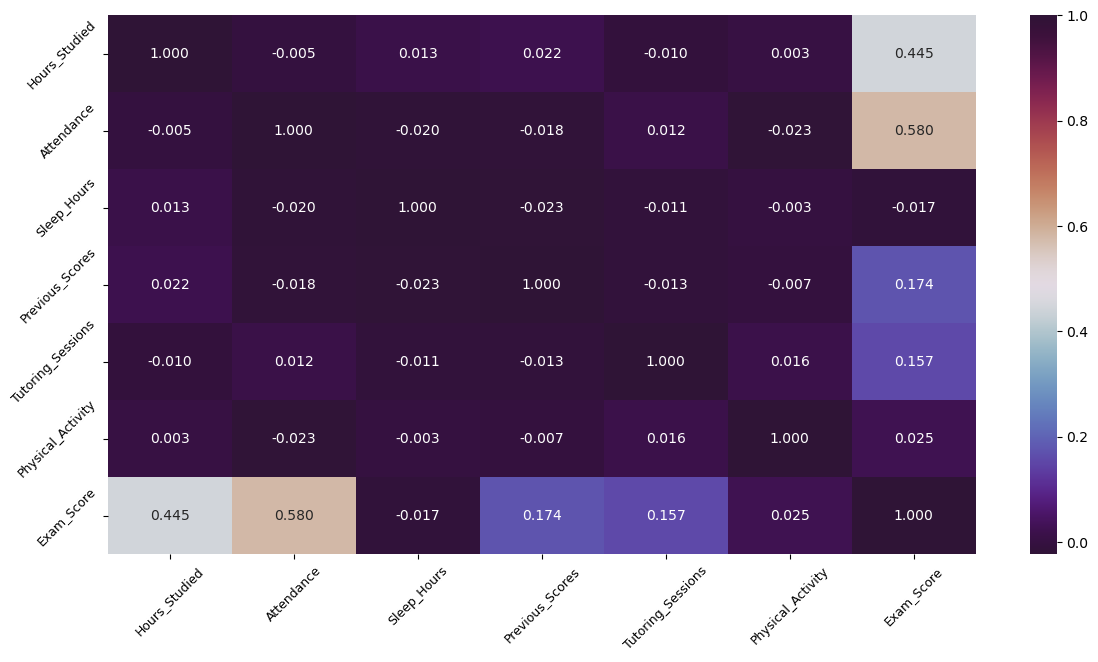

In [64]:
plt.figure(figsize=(14,7))
sns.heatmap(numVar.corr(), annot=True, fmt='.3f', cmap=palettes[5])

#plt.xlabel('X axis', fontsize=12)
plt.xticks(fontsize=9, rotation=45) 
plt.yticks(fontsize=9, rotation=45) 

plt.show()

We notice that there may exist 2 linear relationship as follows : <br>
__Attendance <-> Exam_Score__   <br> __Hours_Studied <-> Exam_Score__

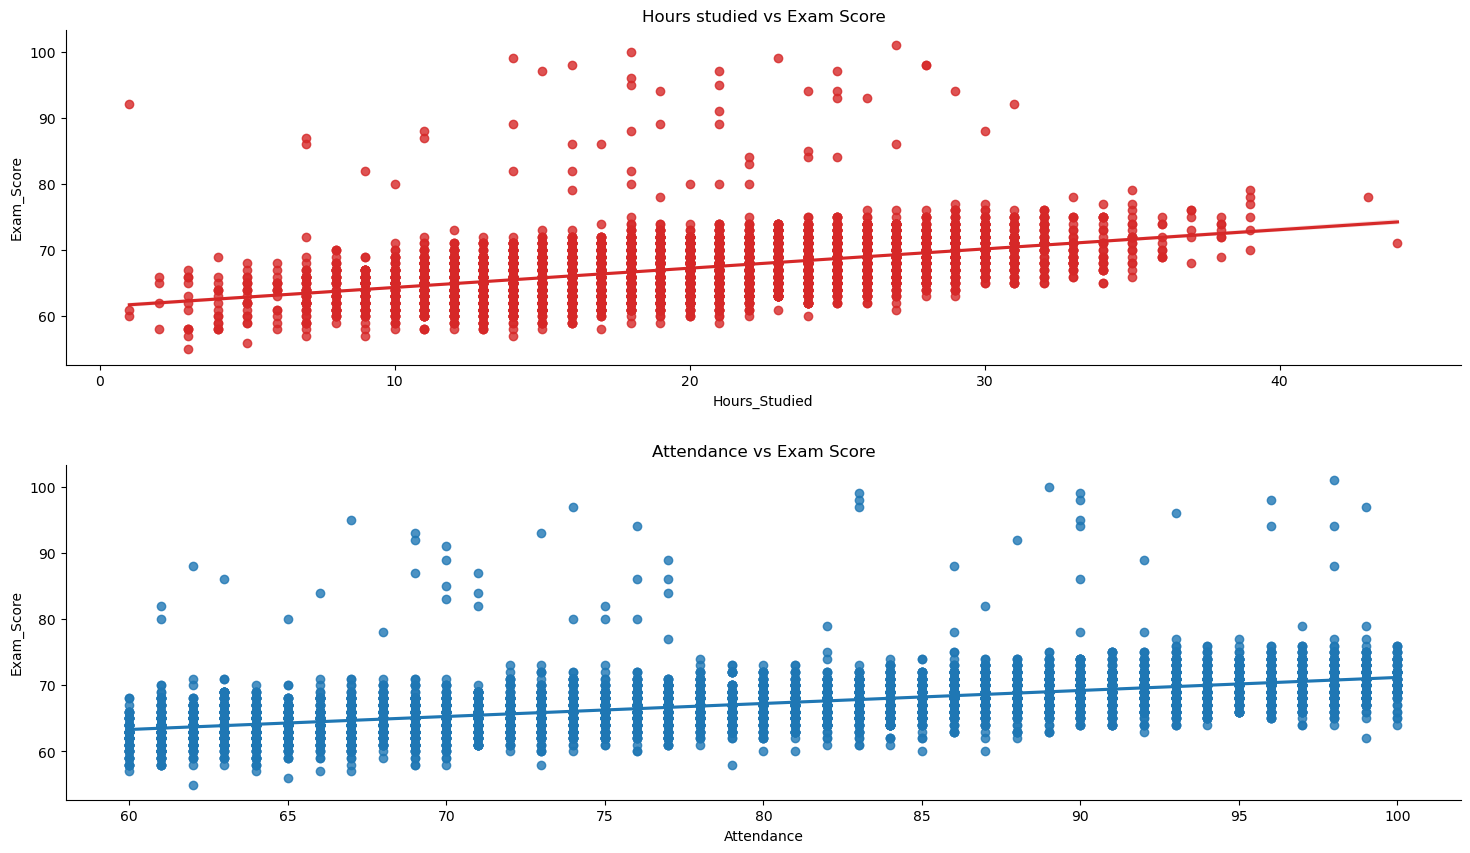

In [65]:
# Visualising
fig, axes = plt.subplots(2, 1, figsize=(18,10))

sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', color=colors[1], ax=axes[0])
sns.despine()
axes[0].set_title("Hours studied vs Exam Score")

sns.regplot(data=df, x='Attendance', y='Exam_Score', ax=axes[1])
sns.despine()
axes[1].set_title('Attendance vs Exam Score')

plt.subplots_adjust(hspace=0.3)
plt.show()

We must note that even if the majority of data points are on the regression line, the outliers in the data can still have a significant impact on the regression line. 

### Correlation between categorical variables

In [66]:
catVar1 = catVar2 = catVar.columns.tolist()
catVarProd = np.array(np.meshgrid(catVar1, catVar2)).T.reshape(-1,2)
catVarProd

array([['Parental_Involvement', 'Parental_Involvement'],
       ['Parental_Involvement', 'Access_to_Resources'],
       ['Parental_Involvement', 'Extracurricular_Activities'],
       ['Parental_Involvement', 'Motivation_Level'],
       ['Parental_Involvement', 'Internet_Access'],
       ['Parental_Involvement', 'Family_Income'],
       ['Parental_Involvement', 'Teacher_Quality'],
       ['Parental_Involvement', 'School_Type'],
       ['Parental_Involvement', 'Peer_Influence'],
       ['Parental_Involvement', 'Learning_Disabilities'],
       ['Parental_Involvement', 'Parental_Education_Level'],
       ['Parental_Involvement', 'Distance_from_Home'],
       ['Parental_Involvement', 'Gender'],
       ['Access_to_Resources', 'Parental_Involvement'],
       ['Access_to_Resources', 'Access_to_Resources'],
       ['Access_to_Resources', 'Extracurricular_Activities'],
       ['Access_to_Resources', 'Motivation_Level'],
       ['Access_to_Resources', 'Internet_Access'],
       ['Access_to_Resour

In [67]:
import scipy.stats as ss
result = [ (
            i[0].item(),
            i[1].item(), 
            ss.chi2_contingency(pd.crosstab(catVar[i[0]].values, catVar[i[1]].values))[1].item()
            ) for i in catVarProd if i[0] != i[1] 
        ]
    
result

[('Parental_Involvement', 'Access_to_Resources', 0.032310713997641724),
 ('Parental_Involvement', 'Extracurricular_Activities', 0.12599922403312347),
 ('Parental_Involvement', 'Motivation_Level', 0.40581768551052283),
 ('Parental_Involvement', 'Internet_Access', 0.3760539974766149),
 ('Parental_Involvement', 'Family_Income', 0.35366292511178277),
 ('Parental_Involvement', 'Teacher_Quality', 0.6133329627484825),
 ('Parental_Involvement', 'School_Type', 0.2798057272516605),
 ('Parental_Involvement', 'Peer_Influence', 0.2880124566079357),
 ('Parental_Involvement', 'Learning_Disabilities', 0.5982601846421154),
 ('Parental_Involvement', 'Parental_Education_Level', 0.5642476659715645),
 ('Parental_Involvement', 'Distance_from_Home', 0.9238758486909909),
 ('Parental_Involvement', 'Gender', 0.11099481999609864),
 ('Access_to_Resources', 'Parental_Involvement', 0.032310713997641724),
 ('Access_to_Resources', 'Extracurricular_Activities', 0.30517915050925215),
 ('Access_to_Resources', 'Motivatio

In [68]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
# ## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output = chi_test_output.pivot(index='var1', columns='var2', values='coeff')
chi_test_output

var2,Access_to_Resources,Distance_from_Home,Extracurricular_Activities,Family_Income,Gender,Internet_Access,Learning_Disabilities,Motivation_Level,Parental_Education_Level,Parental_Involvement,Peer_Influence,School_Type,Teacher_Quality
var1,,,,,,,,,,,,,
Access_to_Resources,NaN,0.224946,0.305179,0.404558,0.736893,0.337894,0.866016,0.581094,0.430638,0.032311,0.816412,0.022160,0.518225
Distance_from_Home,0.224946,NaN,0.080854,0.269753,0.967799,0.875166,0.891877,0.764190,0.890091,0.923876,0.577609,0.966460,0.769781
Extracurricular_Activities,0.305179,0.080854,NaN,0.645162,0.564409,0.772232,0.393937,0.447690,0.392473,0.125999,0.046096,0.622998,0.294765
Family_Income,0.404558,0.269753,0.645162,NaN,0.963238,0.411211,0.524579,0.606527,0.912118,0.353663,0.493036,0.633356,0.349558
Gender,0.736893,0.967799,0.564409,0.963238,NaN,0.253185,0.101750,0.428033,0.878143,0.110995,0.289665,0.529833,0.896938
Internet_Access,0.337894,0.875166,0.772232,0.411211,0.253185,NaN,0.723130,0.185042,0.157871,0.376054,0.639943,0.431030,0.978946
Learning_Disabilities,0.866016,0.891877,0.393937,0.524579,0.101750,0.723130,NaN,0.219573,0.452293,0.598260,0.505924,0.866309,0.968628
Motivation_Level,0.581094,0.764190,0.447690,0.606527,0.428033,0.185042,0.219573,NaN,0.495543,0.405818,0.300685,0.546278,0.007901
Parental_Education_Level,0.430638,0.890091,0.392473,0.912118,0.878143,0.157871,0.452293,0.495543,NaN,0.564248,0.126715,0.160715,0.728264


    Explaining the result: 
The result of the code is a dataframe where the rows and the columns both represent the categorical columns in our dataframe, and the values in each cell represent the $p-value$ of $Chi-square$ test, where we suppose the following : <br> 
$ H_0 $: $ X $ and $Y$ are independant. 

$ H_1 $ : There exist a significant relationship between $X$ and $Y$.

The $p-value$ is the probability of observing a test statistic at least as extreme as the one observed under the null hypothesis. If the $p-value$ is less than a certain significance level $( < 0.05 )$  , we reject the null hypothesis and conclude that there is a significant relationship between the two variables.
    Result
We find two, probably significant dependancies after test. <br> <br>
$$
Teacher Quality  \equiv Motivation Level 
$$


$$
School Type \equiv Access to Resouces
$$

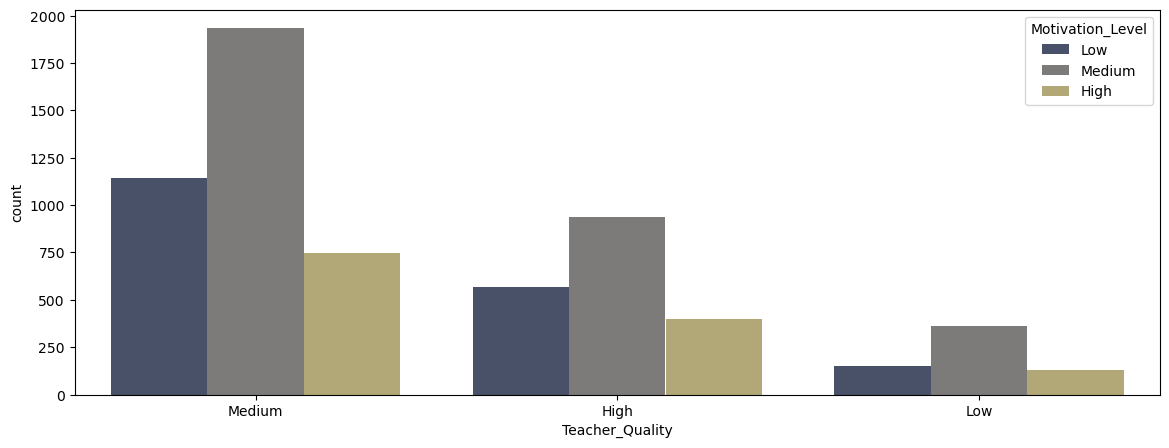

In [69]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='Teacher_Quality', hue='Motivation_Level', palette=palettes[8])

plt.yscale('linear')
plt.show()


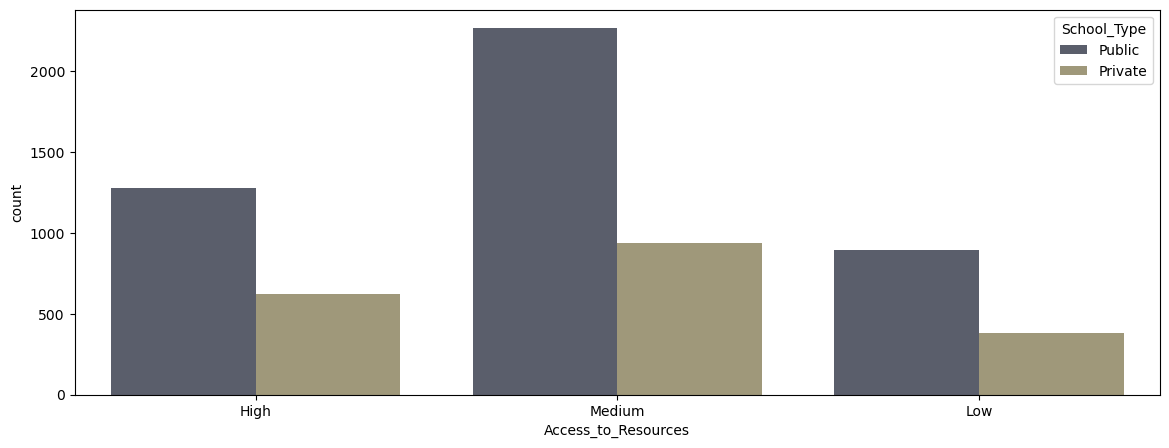

In [70]:
plt.figure(figsize=(14,5))

sns.countplot(data=df, x='Access_to_Resources', hue='School_Type', palette=palettes[8])

plt.yscale('linear')
plt.show()

### Hypothesis testing : Population mean of Exam_score explained by other categorical variables

To determine whether the differences in mean exam scores based on motivation levels are statistically significant, you would typically conduct a hypothesis test, such as an Analysis of Variance (ANOVA) test. Here's how you can approach this:

<span style="font-weight:bold"> Hypothesis Testing Framework </span>

1. **Null Hypothesis (H0)**: The mean exam scores are equal across different motivation levels.
   $$
   H_0: \mu_{\text{High}} = \mu_{\text{Low}} = \mu_{\text{Medium}}
   $$

2. **Alternative Hypothesis (H1)**: At least one motivation level has a different mean exam score.
   $$
   H_1: \text{Not all } \mu \text{ are equal}
   $$

<span style="font-weight:bold"> Steps to Evaluate Significance</span>

1. **Choose a Significance Level**: Commonly, a significance level ($\alpha$) of 0.05 is used.

2. **Conduct ANOVA**: Use ANOVA to compare the means of the exam scores across the different motivation levels. This test will tell you if there are statistically significant differences among the group means.

3. **Calculate F-statistic and p-value**: The ANOVA test will yield an F-statistic and a corresponding p-value.

4. **Decision Rule**:
   - If the p-value is less than or equal to your significance level ($\alpha$), you reject the null hypothesis, suggesting that there are significant differences in mean exam scores based on motivation levels.
   - If the p-value is greater than ($\alpha$), you fail to reject the null hypothesis.

<span style="font-weight:bold"> Interpreting the Results</span>

- **Effect Size**: In addition to the results of the ANOVA test, consider calculating effect size (e.g., eta squared) to understand the magnitude of the differences.
- **Post-hoc Tests**: If you find significant differences, you might want to conduct post-hoc tests (like Tukey's HSD) to identify which specific groups differ from each other.


In [71]:
temp_df = encoded_df.copy()
temp_df['Exam_Score'] = df['Exam_Score']
temp_df.corr()['Exam_Score']


Parental_Involvement          0.156014
Access_to_Resources           0.167856
Extracurricular_Activities   -0.063063
Motivation_Level              0.088502
Internet_Access               0.051124
Family_Income                 0.094555
Teacher_Quality               0.075107
School_Type                   0.010868
Peer_Influence               -0.099133
Learning_Disabilities        -0.083911
Parental_Education_Level      0.105253
Distance_from_Home           -0.088083
Gender                        0.004932
Exam_Score                    1.000000
Name: Exam_Score, dtype: float64

We note that none of the value are nearing neither -1 or 1 to represent a significant relationship with Exam_Score.

In [72]:
for column in numVar:
    temp_df[column] = numVar[column]
    print("-----------", column , "------------")
    print(temp_df.corr()[column])
    temp_df.drop(column, axis=1, inplace=True)

----------- Hours_Studied ------------
Parental_Involvement         -0.014909
Access_to_Resources          -0.003775
Extracurricular_Activities    0.008377
Motivation_Level             -0.011388
Internet_Access               0.006414
Family_Income                 0.001270
Teacher_Quality              -0.006896
School_Type                  -0.001167
Peer_Influence               -0.008521
Learning_Disabilities        -0.013920
Parental_Education_Level     -0.007989
Distance_from_Home            0.017255
Gender                        0.007192
Exam_Score                    0.445104
Hours_Studied                 1.000000
Name: Hours_Studied, dtype: float64
----------- Attendance ------------
Parental_Involvement         -0.008309
Access_to_Resources          -0.012321
Extracurricular_Activities    0.001754
Motivation_Level             -0.002571
Internet_Access              -0.019404
Family_Income                -0.011792
Teacher_Quality              -0.001722
School_Type                   0

    Were we conclude that no significant relationship exist between a categorical data and a numerical one in this dataset

####  Exam_Score & Motivation_Level

In [73]:
Motivation_Level = df.groupby('Motivation_Level')
Motivation_Level['Exam_Score'].mean()

Motivation_Level
High      67.743931
Low       66.764485
Medium    67.338894
Name: Exam_Score, dtype: float64

In [74]:
Motivation_Level['Exam_Score'].std()

Motivation_Level
High      3.895708
Low       3.987609
Medium    3.848861
Name: Exam_Score, dtype: float64

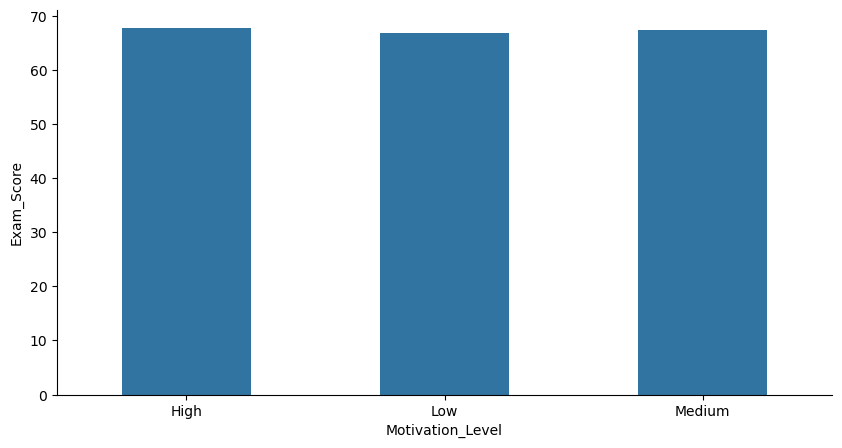

In [75]:
plt.figure(figsize=(10, 5))

sns.barplot(data = Motivation_Level['Exam_Score'].mean(), width=0.5)
plt.yscale('linear')
sns.despine()

plt.show()

##### Summary

While the means show that high motivation scores higher than low motivation, the observed differences alone do not confirm statistical significance. Conducting an ANOVA test will provide a more rigorous framework to determine whether the differences in means are statistically significant, which can help support or refute hypotheses regarding the impact of motivation on exam scores.

####  Exam_Score based & Parental_Education

In [76]:
Parental_Involvement = df.groupby(['Parental_Involvement'])
Parental_Involvement['Exam_Score'].mean()

Parental_Involvement
High      68.112200
Low       66.378776
Medium    67.113196
Name: Exam_Score, dtype: float64

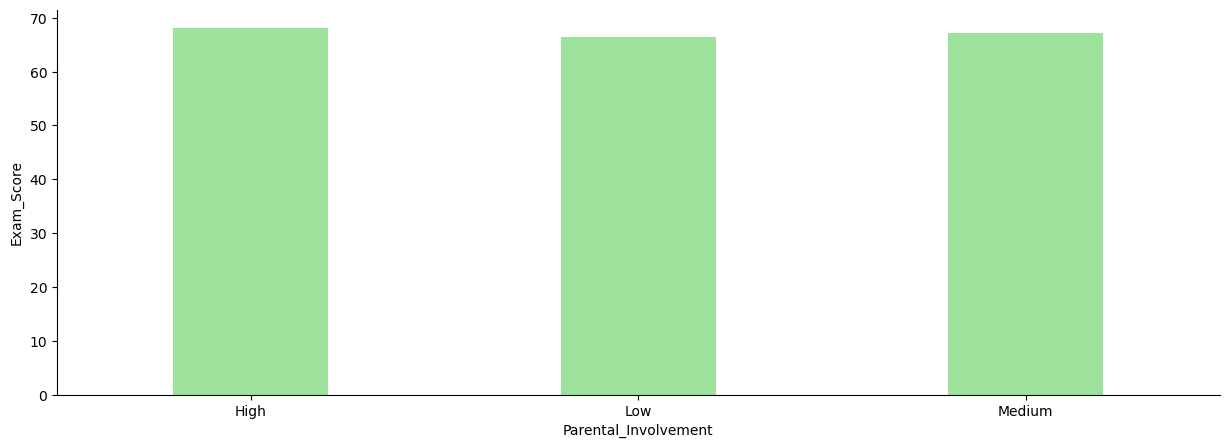

In [77]:
plt.figure(figsize=(15,5))


sns.barplot(data= Parental_Involvement['Exam_Score'].mean(), width = 0.4, color='lightgreen')
sns.despine()

plt.yscale('linear')

plt.show()

### Confidence interval

#### definition
In order to calculate the confidence interval, the margin error need to be calculated: 
$$
Margin Of Error = z^* \times SE
$$
<br>

<br>

##### Formula 1: Standard Error for a Proportion
$$
SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

$$
ConfidenceInterval = [ \^{p} - MarginOfError, \^{p} + MarginOfError ]
$$
<br>

$$
With : \^{p} = \frac{NumberOfSuccess}{SampleSize}
$$

- **$(\^{p})$** is the sample proportion (e.g., the proportion of students with learning disabilities).
- **$(n)$** is the sample size.

This formula is specifically for calculating the standard error when you are estimating a **proportion** (e.g., the proportion of "positive" cases like students with learning disabilities).

- **Use Case**: You have a sample of size $(n)$ from a larger population and you are trying to estimate the true population proportion.
- **Assumption**: The data is binary or categorical (yes/no, positive/negative), so we are interested in the proportion of successes (positive cases).

##### Formula 2: Standard Error Using Population Standard Deviation
$$
SE = \frac{\sigma}{\sqrt{n}}
$$
<br>

$$
confidenceInterval = sampleMean \pm marginError
$$

- **$(\sigma)$** is the **population standard deviation**, which measures the spread of the entire population's values.
- **$(n)$** is the sample size.

This formula is used when you are dealing with **continuous variables** and you know the **true population standard deviation**. It is often used when you're estimating a **mean** (average) rather than a proportion.

- **Use Case**: You have continuous data (e.g., hours studied, sleep hours) and you want to estimate the **mean** for a sample from the population.
- **Assumption**: The variable is continuous, and you have access to the population standard deviation.

##### Key Difference and Which Formula to Use

- **For Proportions**: If you're working with a binary or categorical variable (e.g., "Does the student have a learning disability?" with answers of yes/no), the correct formula is the **first one**:
  $$
  SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
  $$
  This works because it takes into account the variability in the proportion of "positive" cases within your sample.

- **For Means**: If you are working with a continuous variable and you have access to the **true population standard deviation**, you can use the **second formula**:
  $$
  SE = \frac{\sigma}{\sqrt{n}}
  $$
  But this is more relevant when estimating the mean of continuous variables, not proportions.

If you're estimating the proportion of students with learning disabilities in a dataset:
- Let’s say your dataset contains all students, and you want to estimate the proportion of students with learning disabilities.
- You would **use the first formula** to calculate the standard error because you're estimating a **proportion** (the fraction of students with disabilities).

If you're working with a **continuous variable**, like hours studied or sleep hours, and trying to estimate the **mean** hours for a portion of the dataset, you would use the **second formula**.

The second formula is inappropriate for proportions because it assumes continuous data and the use of the **population standard deviation**. A proportion (like the fraction of students with learning disabilities) is a **discrete** value, bounded between 0 and 1, and has a different kind of variability than continuous measures.


#### Confidence Interval : Exam_Score

In [78]:
# Let's study the 95% confidence interval of Exam_Score : 
# n = 1000 ; z* = 1.96
from math import sqrt
sample = df.sample(1000)
sample_mean = sample['Exam_Score'].mean()
std = df.describe()['Exam_Score']['std']
Margin_Error = 1.96 * ( std/sqrt(1000) )
confidence_interval = [sample_mean - Margin_Error , sample_mean + Margin_Error]

confidence_interval

[67.11039434743931, 67.59560565256068]

Wich mean we can say that there is a 95% chance that the mean of Exam_Score falls within that intervall.

In the previus example, we worked with numerical columns which pose no problem. Now, let's try to construct a confidence interval for categorical columns

#### Confidence interval : Internet Access

In [79]:

p_hat = df.query("Internet_Access == 'Yes'").shape[0] / df.shape[0]
sample = df.sample(500)
SE = sqrt( p_hat * (1 - p_hat ) / 500 )
Margin_Error = 1.96 * SE

print(f"The confidence interval of students with internet access is :{(round(p_hat - Margin_Error, 3), round(p_hat+Margin_Error, 3))}")

The confidence interval of students with internet access is :(0.901, 0.947)


this means that we can say with a 95% confidence that at least 90.1% of students have access to internet, and atmost 94.7%.

#### Confidence Interval : learning disabilities

In [80]:
p_hat = df.query("Learning_Disabilities == 'Yes'").shape[0] / df.shape[0]

samples = df.sample(500) # the sample should be random and includ all cases

SE = math.sqrt( (p_hat*(1-p_hat)) / samples.shape[0] ) # Standard Error

MarginError = 1.96 * SE # 95% confidence interval

print(f"The 95% confidence interval is {p_hat - MarginError, p_hat + MarginError}  ")

The 95% confidence interval is (0.07789438835286305, 0.13157566495538406)  


Our 95% confidence interval of **(0.0779,0.1316)** suggests that we are 95% confident that the true proportion of students with learning disabilities in the entire population lies between 7.79% and 13.16%.

#### Confidence Interval : Parental involvement

In [81]:
distinct = df['Parental_Involvement'].unique()

sample = df.sample(500)

for val in distinct:
    p_hat = df.query(f"Parental_Involvement == '{val}'").shape[0] / df.shape[0]
    SE = sqrt( p_hat * (  1 - p_hat) / 500 )
    Margin_Error = 1.96 * SE
    print(f"Confidence interval for {val} Parental involvement : { (round(p_hat - Margin_Error, 4), round(p_hat + Margin_Error,4)) }")

Confidence interval for Low Parental involvement : (0.1672, 0.2376)
Confidence interval for Medium Parental involvement : (0.4659, 0.5535)
Confidence interval for High Parental involvement : (0.2482, 0.3276)


#### Confidence Interval : Access_to_Resources

In [82]:
distinct = df['Access_to_Resources'].unique()
sample = df.sample(500)
for val in distinct:
    p_hat = df.query(f"Access_to_Resources == '{val}'").shape[0] / df.shape[0]
    SE = sqrt(p_hat * (1 - p_hat) / 500)
    Margin_Error = 1.96*SE 
    print(f"Confidence interval for {val} access to resources :  { (round(p_hat - Margin_Error, 4), round(p_hat + Margin_Error,4)) }")

Confidence interval for High access to resources :  (0.2578, 0.338)
Confidence interval for Medium access to resources :  (0.4585, 0.5462)
Confidence interval for Low access to resources :  (0.1647, 0.2348)


#### Confidence Interval : Extracurricular_Activities

In [83]:
p_hat = df.query("Extracurricular_Activities == 'Yes'").shape[0] / df.shape[0]
sample = df.sample(500)
SE = sqrt( p_hat * ( 1-p_hat) / 500)
Margin_Error = 1.96 * SE
print(f"The confidence interval for Extracurrical Activities is :  { (round(p_hat - Margin_Error, 4), round(p_hat + Margin_Error,4)) }")


The confidence interval for Extracurrical Activities is :  (0.5539, 0.6399)


#### Confidence Interval : Tutoring_Sessions

In [84]:
std = df['Tutoring_Sessions'].std() #standard deviation for the whole population
sample = df['Tutoring_Sessions'].sample(500)
sample_mean = sample.mean()
SE = std / sqrt(500)
Margin_Error = 1.96 * SE

print(f"The 95% mean confidence interval for tutoring sessions is : { (round(sample_mean - Margin_Error, 4), round(sample_mean + Margin_Error,4)) }")


The 95% mean confidence interval for tutoring sessions is : (1.3198, 1.5362)


#### Confidence interval : Family_Income

In [85]:
distinct = df['Family_Income'].unique()
sample = df.sample(500)
for val in distinct:
    p_hat = df.query(f"Family_Income == '{val}'").shape[0] / df.shape[0]
    SE = sqrt( p_hat * (1-p_hat) / 500 )
    Margin_Error = 1.96 * SE
    print(f"Confidence interval for {val} family income :  { (round(p_hat - Margin_Error, 4), round(p_hat + Margin_Error,4)) }")

Confidence interval for Low family income :  (0.3618, 0.4479)
Confidence interval for Medium family income :  (0.3593, 0.4453)
Confidence interval for High family income :  (0.1583, 0.2274)


#### Confidence interval : Physical_Activity

In [86]:
std= df['Physical_Activity'].std()
sample = df['Physical_Activity'].sample(500)
sample_mean = sample.mean()
SE = std / sqrt( sample.shape[0] )
Margin_Error = 1.96 * SE
print(f"The 95% mean confidence interval for tutoring sessions is : { (round(sample_mean - Margin_Error, 4), round(sample_mean + Margin_Error,4)) }")


The 95% mean confidence interval for tutoring sessions is : (2.8918, 3.0722)


## Probability Distributions 

we'll only study the following variables: 
**Sleep_Hours**, **Hours_Studied** and **Exam_Score**

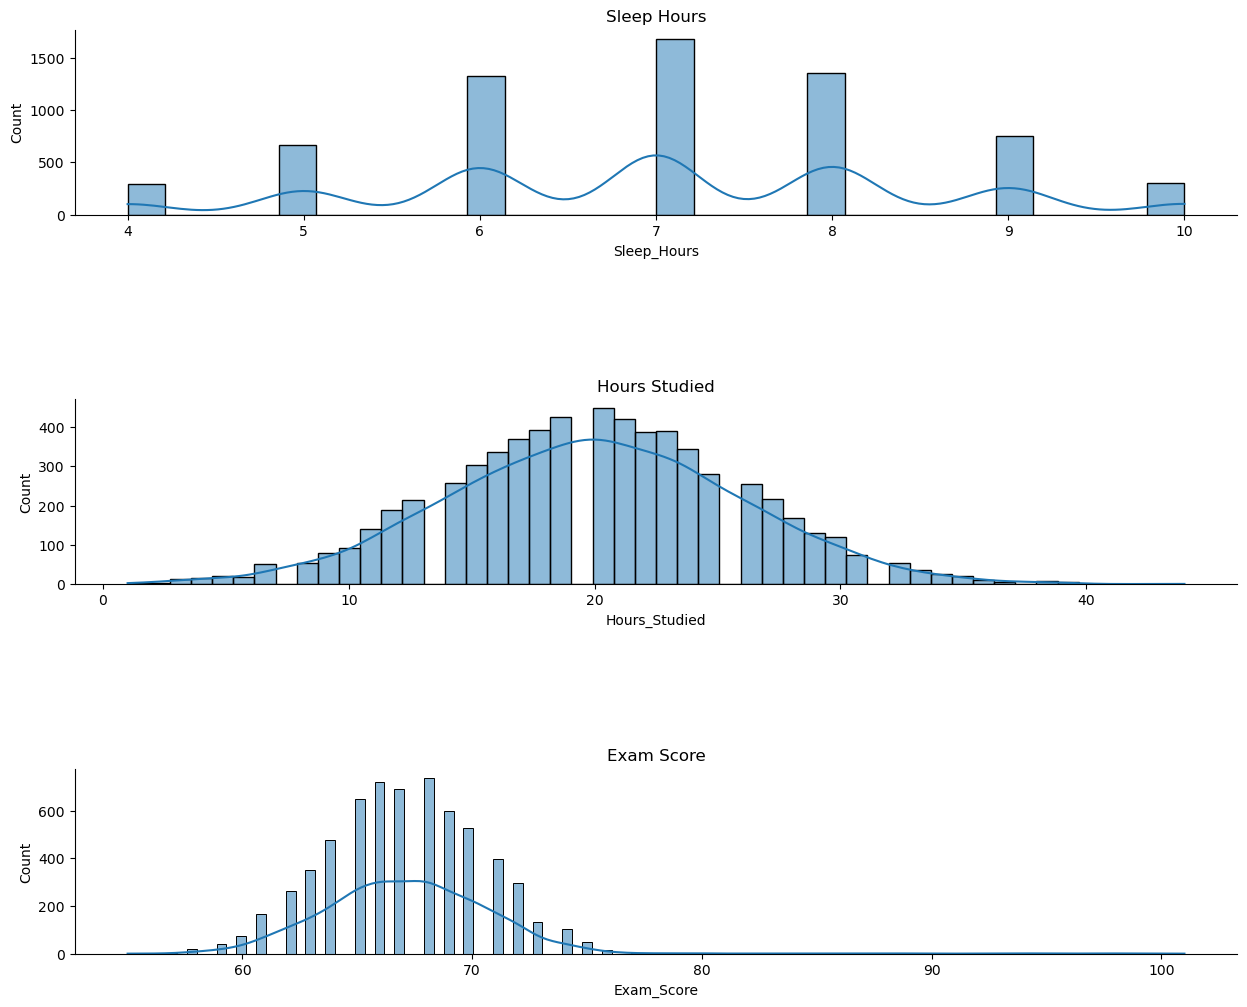

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

sns.histplot(data=df, x='Sleep_Hours', ax=axes[0], kde=True)
sns.despine()
axes[0].set_title('Sleep Hours')

sns.histplot(data=df, x='Hours_Studied', ax=axes[1], kde=True)
sns.despine()
axes[1].set_title('Hours Studied')

sns.histplot(data=df, x='Exam_Score', ax=axes[2], kde=True)
sns.despine()
axes[2].set_title('Exam Score')

plt.subplots_adjust(hspace=1)

plt.show()


since our data is mainy discrete, will try to fit it to a binomial distribution

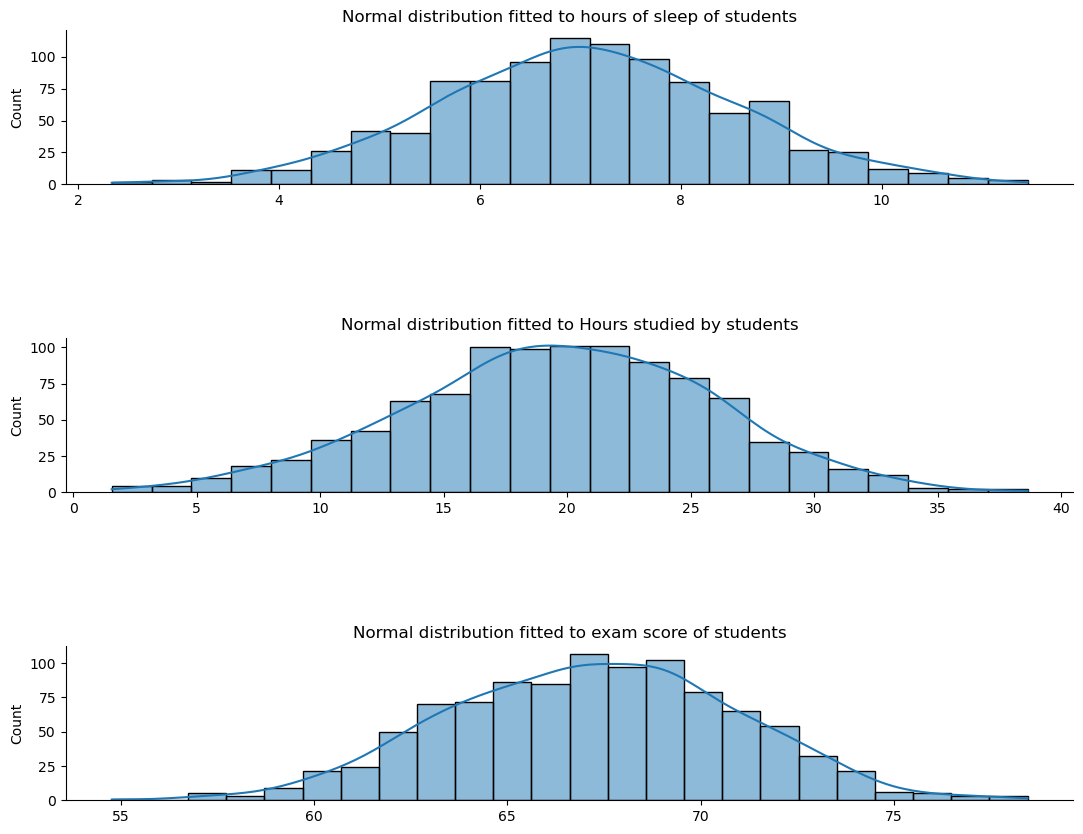

In [88]:
from scipy.stats import norm

mu1, std1 = norm.fit(df['Sleep_Hours'])
mu2, std2 = norm.fit(df['Hours_Studied'])
mu3, std3 = norm.fit(df['Exam_Score'])



fig, ax = plt.subplots(3,1, figsize=(13,10))


sns.histplot(data= np.random.normal(mu1, std1, 1000), kde=True, ax=ax[0])
sns.despine()
ax[0].set_title("Normal distribution fitted to hours of sleep of students")

sns.histplot(data= np.random.normal(mu2, std2, 1000), kde=True, ax=ax[1])
sns.despine()
ax[1].set_title("Normal distribution fitted to Hours studied by students")

sns.histplot(data= np.random.normal(mu3, std3, 1000), kde=True, ax=ax[2])
sns.despine()
ax[2].set_title("Normal distribution fitted to exam score of students")



plt.subplots_adjust(hspace=1)
plt.show()

Now let's try some discrete variables. We'll use the following columns : <br>
**'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level** <br>

we should note that for large n, binomial distribution approximates the normal distribution.

In [89]:
print(df["Access_to_Resources"].unique(), df["Extracurricular_Activities"].unique(), df["Motivation_Level"].unique())


['High' 'Medium' 'Low'] ['No' 'Yes'] ['Low' 'Medium' 'High']


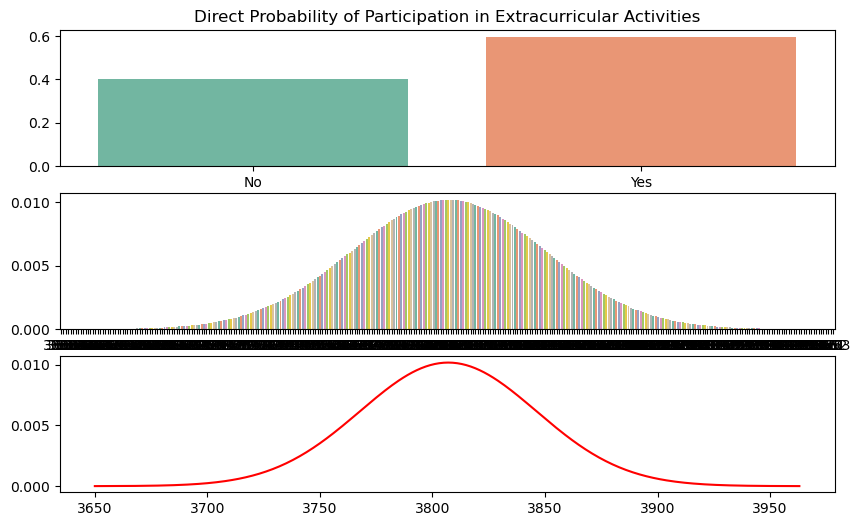

In [90]:
from scipy.stats import binom, norm

n = df.shape[0]
n_success = df.query("Extracurricular_Activities == 'Yes'").shape[0]

p_success = n_success / n
p_failure = 1 - p_success

x = [0, 1]
p_values = [p_failure, p_success]

# Normal approximation 
mean = n * p_success
std_dev = np.sqrt(n * p_success * (1 - p_success))

x_range = np.arange(int(mean - 4 * std_dev), int(mean + 4 * std_dev) + 1)

binom_pmf_values = binom.pmf(x_range, n, p_success)
norm_pdf_values = norm.pdf(x_range, mean, std_dev)

# Plot the probability of participating (Yes/No)
fig, ax = plt.subplots(3,1, figsize=(10, 6))
sns.barplot(x=x, y=p_values, palette='Set2', ax=ax[0])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No', 'Yes'])
ax[0].set_title('Direct Probability of Participation in Extracurricular Activities')

# Plot the binomial PMF
sns.barplot(x=x_range, y=binom_pmf_values, palette='Set2', ax=ax[1])

# Plot the normal approximation
ax[2].plot(x_range, norm_pdf_values, color='red', label='Normal Approximation')


plt.show()

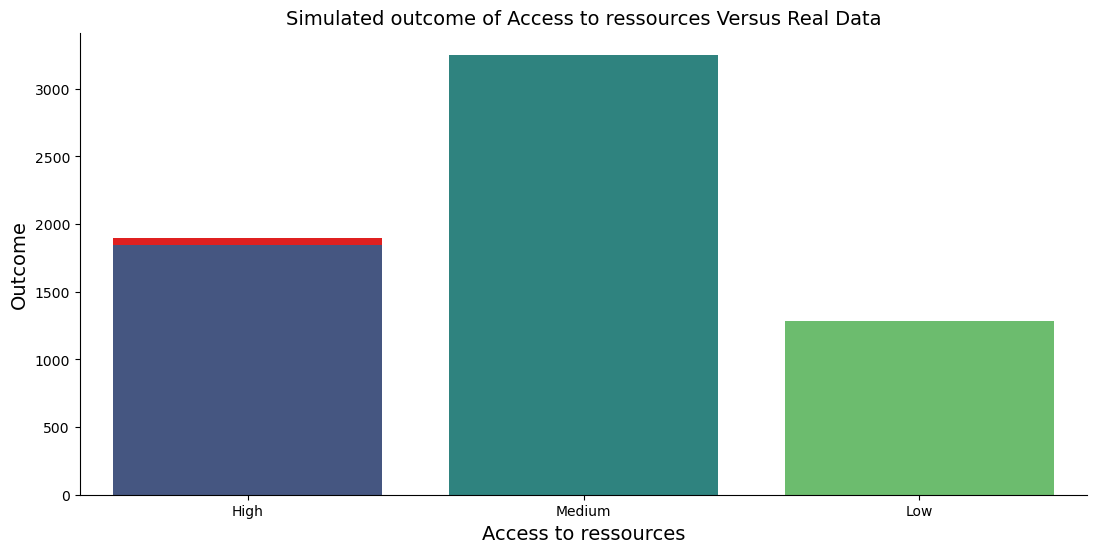

In [91]:
from scipy.stats import multinomial

# n is the total number of observations/ unique rows in the dataset
# k is the number of possible outcome
# p is the vector of probabilities
# The multinomial distribution describes the probability of obtaining specific counts of outcomes in each category after n trials.

n = df.shape[0]
k = df['Access_to_Resources'].unique().shape[0]
categories = df['Access_to_Resources'].unique().tolist()
p = df['Access_to_Resources'].value_counts(sort=False, normalize=True).to_list()
p = np.round(p,4)
multinomial_dist = multinomial(n=n, p=p)
outcome = multinomial_dist.rvs(size=1)



fig, ax = plt.subplots(figsize=(13,6))
sns.countplot(x=df['Access_to_Resources'], color="red", ax=ax)

sns.barplot(x=categories, y=outcome[0], palette="viridis",ax=ax)
sns.despine()


plt.title("Simulated outcome of Access to ressources Versus Real Data", fontsize=14)
plt.xlabel("Access to ressources", fontsize=14)
plt.ylabel("Outcome", fontsize=14)
plt.show()



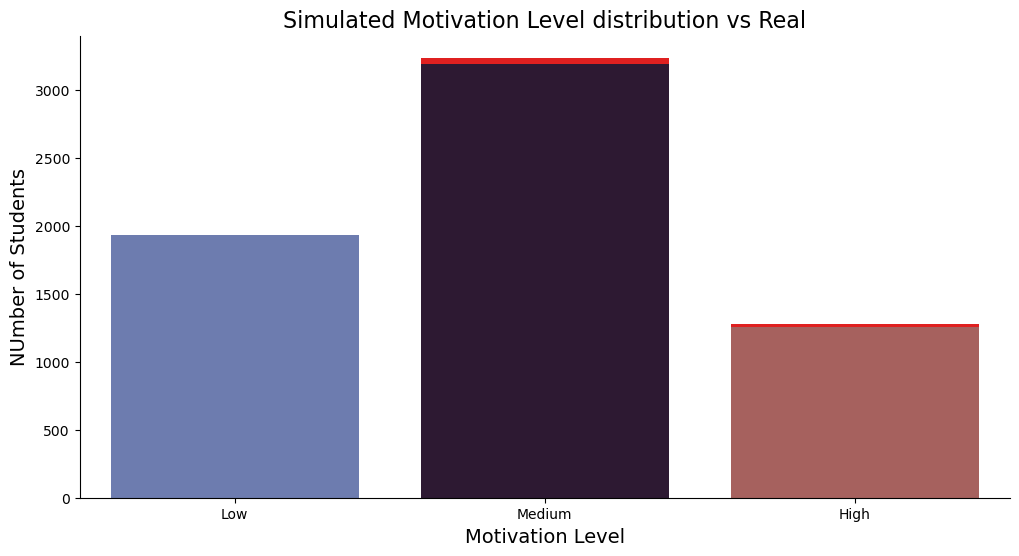

In [92]:
p = df['Motivation_Level'].value_counts(sort=False, normalize=True).to_list()
multinomial_dist = multinomial(n=n,p=p)
outcome = multinomial_dist.rvs(size=1)[0]


fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data = df , x= 'Motivation_Level', color="red", ax=ax)
sns.barplot(x = df['Motivation_Level'].unique().tolist(), y = outcome, palette=palettes[4], ax=ax)
sns.despine()
ax.set_title("Simulated Motivation Level distribution vs Real", fontsize=16)
ax.set_xlabel("Motivation Level", fontsize=14)
ax.set_ylabel("NUmber of Students", fontsize=14)

plt.show()


## Machine Learning

### Regression Analysis
#### What is Regression Analysis?

**Regression analysis** is a statistical technique used to model the relationship between one or more **independent variables** (predictors) and a **dependent variable** (outcome). It helps to understand how changes in the predictors affect the outcome.

#### Key Types of Regression:

1. **Linear Regression**:
   - Models the relationship between one or more predictors (independent variables) and a continuous outcome (dependent variable) by fitting a linear equation.
   - **Equation**: \( y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \epsilon \)
     - \(y\) = dependent variable (e.g., exam score)
     - \(x_1, x_2, \dots\) = independent variables (e.g., hours studied, motivation level)
     - \( \beta_0 \) = intercept, \( \beta_1, \dots, \beta_n \) = regression coefficients
     - \( \epsilon \) = error term

2. **Logistic Regression**:
   - Used when the dependent variable is **binary** (yes/no, success/failure).
   - Models the probability of an outcome as a function of the predictors.
   - **Equation**: \( \log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n \)
     - \(p\) = probability of the outcome (e.g., probability of passing an exam).

3. **Polynomial Regression**:
   - A form of linear regression but the relationship between the predictors and the outcome is modeled as an **nth-degree polynomial**.
   - **Equation**: \( y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon \)

4. **Multinomial Logistic Regression**:
   - Used when the dependent variable has more than two categories (e.g., "Low", "Medium", "High").

5. **Multiple Linear Regression**:
   - Similar to linear regression but with **multiple predictors**.

---

#### Steps for Regression Analysis:

##### 1. **Define the Problem**
   - Identify your **dependent variable** (what you're predicting).
   - Identify your **independent variables** (predictors).

##### 2. **Exploratory Data Analysis (EDA)**:
   - **Visualize relationships** between variables using scatter plots or correlation matrices.
   - **Check for multicollinearity** among independent variables (e.g., using VIF – Variance Inflation Factor).
   - **Handle missing data** by either removing or imputing.

##### 3. **Fit the Regression Model**:
   In Python, you can use libraries like `statsmodels` or `scikit-learn` for regression.

##### 4. **Check Model Assumptions**:
For linear regression:
   - **Linearity**: The relationship between the independent and dependent variables is linear.
   - **Normality of residuals**: Residuals (errors) should be normally distributed.
   - **Homoscedasticity**: Constant variance of the residuals.
   - **Independence**: Observations should be independent of each other.

You can use residual plots and statistical tests like the **Durbin-Watson test** to check these assumptions.

##### 5. **Interpret the Results**:
   - **Coefficients**: The \(\beta\) values show how much the dependent variable changes when the independent variable increases by one unit.
   - **R-squared**: Indicates how well the independent variables explain the variance in the dependent variable (ranges from 0 to 1).
   - **p-values**: Tests if the independent variables significantly predict the dependent variable (usually, \( p < 0.05 \) is considered significant).

##### 6. **Validate the Model**:
   - **Split your data** into training and testing sets to ensure your model generalizes well to unseen data.
   - Use **cross-validation** to assess model performance.

##### 7. **Refine the Model**:
   - If the model isn't performing well, consider:
     - Adding more predictors.
     - Transforming variables (e.g., log, square root).
     - Using regularization techniques like **Ridge** or **Lasso regression**.



In [93]:
import statsmodels.api as sm 
# Assuming df is your dataset and you're predicting 'Exam_Score' using 'Hours_Studied'
X = df['Hours_Studied']
y = df['Exam_Score']
# Add a constant to the model (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1575.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          4.52e-308
Time:                        17:10:27   Log-Likelihood:                -17049.
No. Observations:                6378   AIC:                         3.410e+04
Df Residuals:                    6376   BIC:                         3.412e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.4372      0.153    401.704